# 심층신경망
- 은닉층을 깊게 쌓은 뉴럴 네트워크

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### MNIST 데이터
- 70,000개의 손글씨 숫자 이미지 데이터셋 (해상도 28 X 28 px)
    - 60,000개의 훈련 데이터와 10,000개의 테스트 데이터로 구분되어있음
- 10개의 범주(category)를 가짐
    - 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [2]:
# 1. 데이터 로드 및 정규화
mnist = datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화: 각 픽셀의 값은 기본적으로 0에서 255 사이의 정수이지만, 안정적인 학습을 위해 0과 1사이의 실수로 정규화
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 데이터 형태 확인
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")

Training data shape: (60000, 28, 28), Training labels shape: (60000,)


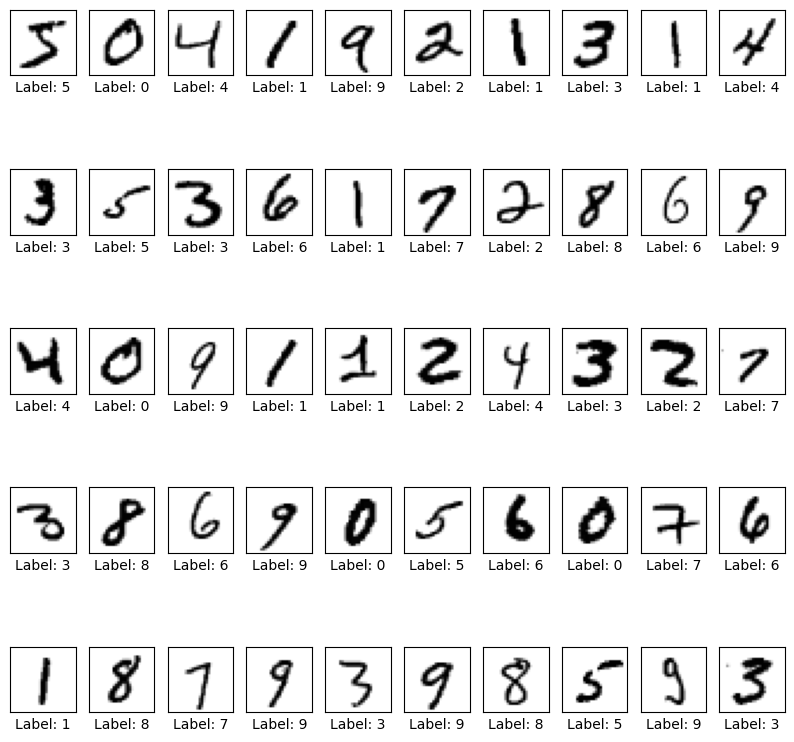

In [5]:
# 데이터 시각화
plt.figure(figsize=(10, 10))
for i in range(50):  # 데이터셋 앞부분의 25개 이미지 시각화
    plt.subplot(5, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)  # 흑백 이미지 출력 시 사용
    plt.xlabel(f"Label: {y_train[i]}")  # 레이블 출력
plt.show()

In [6]:
# 2. 모델 정의
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # 입력: 28x28 이미지를 1D 벡터로 변환
    layers.Dense(512, activation='relu'),  # 은닉층: 512개의 뉴런
    layers.Dropout(0.2),                   # 드롭아웃: 과적합 방지. 512개중 20%를 꺼줌
    layers.Dense(10, activation='softmax') # 출력층: 10개 클래스의 확률
])

# 모델 요약 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# 3. 모델 컴파일
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [9]:
# 4. 모델 학습
history = model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0229 - accuracy: 0.9930
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0205 - accuracy: 0.9931
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0194 - accuracy: 0.9939
Epoch 4/10
938/938 [==============================] - 1s 2ms/step - loss: 0.0185 - accuracy: 0.9942
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0166 - accuracy: 0.9948
Epoch 6/10
938/938 [==============================] - 1s 2ms/step - loss: 0.0132 - accuracy: 0.9959
Epoch 7/10
938/938 [==============================] - 1s 2ms/step - loss: 0.0139 - accuracy: 0.9952
Epoch 8/10
938/938 [==============================] - 1s 2ms/step - loss: 0.0120 - accuracy: 0.9959
Epoch 9/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0137 - accuracy: 0.9955
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0123 - accuracy: 0.9957

In [10]:
# 5. 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

313/313 [==============================] - 0s 545us/step - loss: 0.0765 - accuracy: 0.9822
Test Accuracy: 0.9822, Test Loss: 0.0765


<hr />

### Fashion MNIST 데이터
- 70,000개의 패션 관련 이미지 (해상도 28 X 28 px)
    - 60,000개의 훈련 데이터와 10,000개의 테스트 데이터로 구분되어있음
- 10개의 범주(category)를 가짐
    - 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'

In [9]:
# 1. 데이터 로드 및 정규화
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 데이터 정규화: 각 픽셀의 값은 기본적으로 0에서 255 사이의 정수이지만, 안정적인 학습을 위해 0과 1사이의 실수로 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

# 데이터 형태 확인
print(f"Train images shape: {train_images.shape}, Train labels shape: {train_labels.shape}")

Train images shape: (60000, 28, 28), Train labels shape: (60000,)


In [10]:
# 2. 모델 정의
model = models.Sequential()
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Flatten()) # 2차원 입력벡터(28*28)를 1차원 벡터(784)로 평탄화
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

model.summary() # 모델 요약해 가시적으로 보여주는 함수

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# 3. 모델 컴파일
model.compile(optimizer='adam', # Adam은 학습률 기본값으로 0.001을 사용
              loss='sparse_categorical_crossentropy', # 클래스 레이블이 정수형인 다중 클래스 분류에 사용하는 크로스 엔트로피
              metrics=['accuracy'])

In [12]:
# 4. 모델 학습
history = model.fit(train_images, train_labels, epochs=10, batch_size=100)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7212 - loss: 0.7952
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8504 - loss: 0.4232
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8647 - loss: 0.3789
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8721 - loss: 0.3558
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8765 - loss: 0.3440
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8841 - loss: 0.3206
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8845 - loss: 0.3117
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8904 - loss: 0.2993
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8920 - loss: 0.2926
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8935 - loss: 0.2901


In [13]:
# 5. 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test 정확도:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.8776 - loss: 0.3329
Test 정확도: 0.8787000179290771
